In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.patches as mpatches
from psynlig import pca_2d_scores

In [2]:
emma_data = pd.read_csv('../data/FullData.txt', sep='\t')

In [3]:
emma_data.head()

,Order,Family,Strand,Species,-,A,C,D,E,F,...,N,P,Q,R,S,T,V,Y,W,X
Alphaflexiviridae_u17540|Narcissus,Tymovirales,Alphaflexiviridae,positive,u17540|Narcissus,230,12,1,8,5,7,...,5,2,4,2,3,8,2,4,0,0
Alphaflexiviridae_u17602,Tymovirales,Alphaflexiviridae,positive,u17602,230,9,1,8,5,6,...,4,3,5,2,5,7,4,4,1,0
Alphaflexiviridae_u4329|Lily,Tymovirales,Alphaflexiviridae,positive,u4329|Lily,230,11,2,7,5,5,...,3,3,7,1,4,7,2,4,0,0
Alphaflexiviridae_u6633|Papaya,Tymovirales,Alphaflexiviridae,positive,u6633|Papaya,230,11,1,8,5,7,...,4,3,4,1,4,9,2,2,0,0
Alphaflexiviridae_u11143,Tymovirales,Alphaflexiviridae,positive,u11143,230,10,1,8,6,9,...,5,3,4,2,3,7,5,4,0,0


In [4]:
for_pca = emma_data[emma_data.columns[5:]].reset_index(drop=True)

In [5]:
for_pca['total'] = for_pca.sum(axis=1)
for col in emma_data[emma_data.columns[5:]].columns:
    for_pca[col] = for_pca[col]/for_pca['total']
for_pca = for_pca.drop('total',axis=1)

In [6]:
model = PCA(n_components=21)
pca_fit = model.fit(for_pca)
pca_model = pca_fit.transform(for_pca)
pca_data = pd.DataFrame(pca_model, columns=["pc"+str(i+1) for i in range(len(for_pca.columns))])
pca_data1 = pca_data[["pc1","pc2"]].copy()

In [7]:
pca_data1['strand'] = emma_data['Strand'].to_list()

In [8]:
g=sns.jointplot(data=pca_data1, x="pc1", y="pc2", hue="strand", alpha=0.05)#, xlim = (-10,12), ylim = (-10,10))
g.fig.set_figwidth(15)
g.fig.set_figheight(15)

x_mean = pca_data1[pca_data1['strand']=='positive ']["pc1"].mean()
x_std = pca_data1[pca_data1['strand']=='positive ']["pc1"].std()
g.ax_marg_x.axvspan(x_mean - x_std, x_mean + x_std, color='blue', alpha=0.1)
y_mean = pca_data1[pca_data1['strand']=='positive ']["pc2"].mean()
y_std = pca_data1[pca_data1['strand']=='positive ']["pc2"].std()
g.ax_marg_y.axhspan(y_mean - y_std, y_mean + y_std, color='blue', alpha=0.1)
g.refline(x=x_mean, y=y_mean, color='blue', ls='--')

x_mean = pca_data1[pca_data1['strand']=='double']["pc1"].mean()
x_std = pca_data1[pca_data1['strand']=='double']["pc1"].std()
g.ax_marg_x.axvspan(x_mean - x_std, x_mean + x_std, color='orange', alpha=0.1)
y_mean = pca_data1[pca_data1['strand']=='double']["pc2"].mean()
y_std = pca_data1[pca_data1['strand']=='double']["pc2"].std()
g.ax_marg_y.axhspan(y_mean - y_std, y_mean + y_std, color='orange', alpha=0.1)
g.refline(x=x_mean, y=y_mean, color='orange', ls='--')

x_mean = pca_data1[pca_data1['strand']=='negative']["pc1"].mean()
x_std = pca_data1[pca_data1['strand']=='negative']["pc1"].std()
g.ax_marg_x.axvspan(x_mean - x_std, x_mean + x_std, color='green', alpha=0.1)
y_mean = pca_data1[pca_data1['strand']=='negative']["pc2"].mean()
y_std = pca_data1[pca_data1['strand']=='negative']["pc2"].std()
g.ax_marg_y.axhspan(y_mean - y_std, y_mean + y_std, color='green', alpha=0.1)
g.refline(x=x_mean, y=y_mean, color='green', ls='--')

#for aa_num in range(len(list(emma_data.columns[5:]))):
#    aa = list(emma_data.columns[5:])[aa_num]
#    coords = np.transpose(model.components_[0:2, :])[aa_num]
#    plt.annotate('default line', xy=(0,0), xytext=(coords[0],coords[1]),
#            arrowprops={'arrowstyle': '-'}, va='center')


plt.xlabel("pc1:" + "{:.2f}".format(model.explained_variance_ratio_[0] * 100) + " %", fontsize=25)
plt.ylabel("pc2:" + "{:.2f}".format(model.explained_variance_ratio_[1] * 100) + " %", fontsize=25)
plt.legend(fontsize='x-large', title_fontsize='40')
 
g.fig.suptitle("PCA distribution of amino acids in RdRp", fontsize=25, x=0.5, y=1) 
g.savefig('../figures/pca_emmadata_allviruses.pdf', dpi=300, bbox_inches = 'tight')
plt.close()


In [9]:
# coordinates of samples (i.e., scores; let's take the first two axes)
scores = pca_model[:, :2]

# coordinates of features (i.e., loadings; note the transpose)
loadings = model.components_[:2].T

# proportions of variance explained by axes
pvars = model.explained_variance_ratio_[:2] * 100

In [10]:
arrows = loadings * np.abs(scores).max(axis=0)

In [16]:
pos_gainers = ['S', 'R', 'C']
pos_loosers = ['A', 'T', 'D', 'E']

neg_gainers = ['R', 'Y', 'I', 'H', 'N']
neg_loosers = ['M', 'A', 'D', 'E']

ds_gainers = ['S', 'L', 'F', 'R', 'C', 'H']
ds_loosers = ['A', 'M', 'D', 'E', 'N', 'K']

plt.figure(figsize=(15, 15))

sns.scatterplot(data=pca_data1, 
                x="pc1", 
                y="pc2", 
               hue=pca_data1['strand'], alpha=0.05)

#plt.xlim(-10,12)
#plt.ylim(-10,10)

#plt.legend(title='Species')

# empirical formula to determine arrow width
width = -0.0075 * np.min([np.subtract(*plt.xlim()), np.subtract(*plt.ylim())])

# features as arrows
for i, arrow in enumerate(arrows):
    plt.arrow(0, 0, *arrow, color='k', alpha=0.5, width=width, ec='none',
              length_includes_head=True)
    if list(emma_data.columns[5:])[i] in neg_gainers:
        col='red'
    elif list(emma_data.columns[5:])[i] in neg_loosers:
        col='blue'
    else:
        col='black'
    plt.text(*(arrow * 1.1), list(emma_data.columns[5:])[i],
             ha='center', va='center', fontsize=20, color=col)

  
plt.xlabel("pc1:" + "{:.2f}".format(model.explained_variance_ratio_[0] * 100) + " %", fontsize=25)
plt.ylabel("pc2:" + "{:.2f}".format(model.explained_variance_ratio_[1] * 100) + " %", fontsize=25)
plt.legend(fontsize='x-large', title_fontsize='40')

plt.suptitle("PCA distribution of amino acids in RdRp", fontsize=25, x=0.5, y=0.91) 
plt.savefig('../figures/pca_emmadata_allviruses_biplot_negative.pdf', dpi=300, bbox_inches = 'tight')
plt.close()

C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


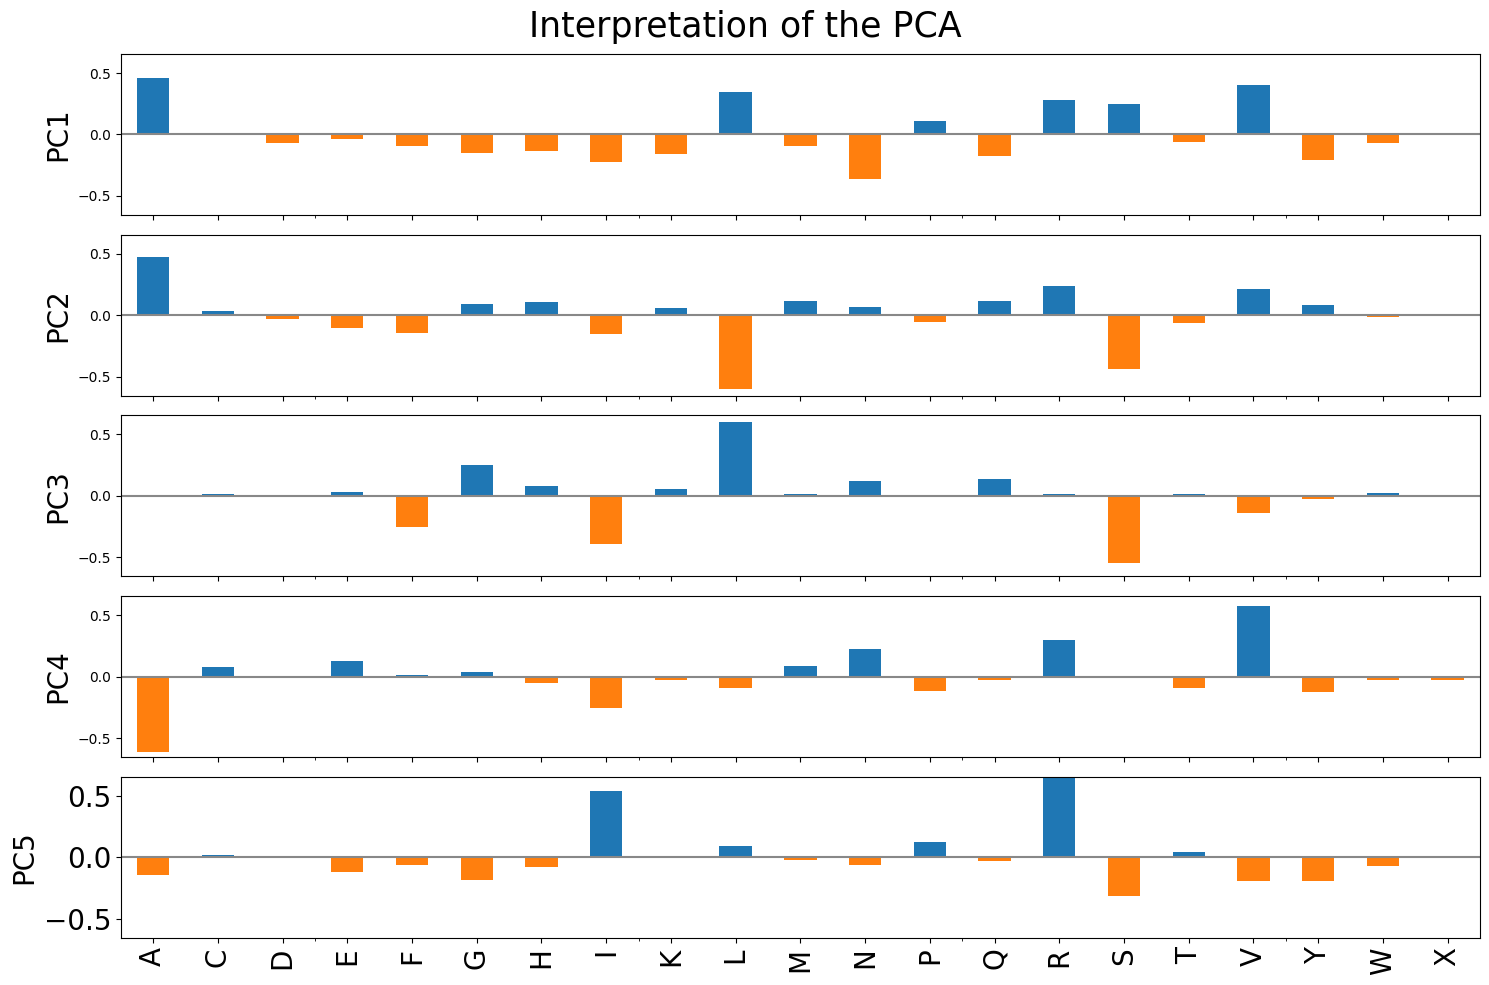

In [30]:
loadings = pd.DataFrame(model.components_[0:5, :], 
                        columns=for_pca.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))
f, axes = plt.subplots(5, 1, figsize=(15, 10), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}', fontsize=20)
    ax.set_ylim(-maxPC, maxPC)
plt.suptitle('Interpretation of the PCA', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

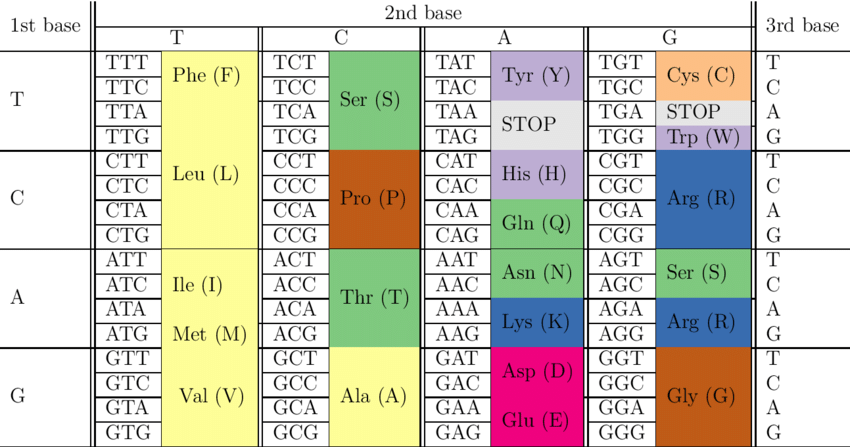